In [1]:
import rawpy
import numpy as np
from scipy.ndimage.filters import convolve

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.figsize"] = 10, 15

In [2]:
H_G = np.asarray(
    [[0, 1, 0],
    [1, 4, 1],
    [0, 1, 0]], dtype=np.float64 ) / 4

H_RB = np.asarray(
    [[1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]], dtype=np.float64) / 4

In [13]:
import glob

raws = []
rpyraws = []
for i in sorted(glob.glob("../photos/positives/Norfolk & Cricket 1977/*.NEF"))[:25]:
    # print(i)
    raw = rawpy.imread(i)
    # rpyraws.append(raw)
    # imcopy = raw.raw_image_visible.copy()
    # pog = np.concatenate((
    #     convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
    #     convolve((imcopy*(raw.raw_colors_visible%2)), H_G)[:,:,np.newaxis],
    #     convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
    # ), axis=2)
    pog = raw.postprocess(output_bps=16)
    pog = pog/pog.max()
    print(pog.shape)
    raws.append(pog)
raws=np.asarray(raws)
# raws

(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)
(4012, 6034, 3)


In [4]:
rawsgamma = raws #** (1/2.4)
# print("gammacc")

In [5]:

pogawbb = np.percentile(rawsgamma[:,::10,::10], 10, (0, 1, 2))
pogawbw = np.percentile(rawsgamma[:,::10,::10], 99, (0, 1, 2))
print("wbcalc")
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))

wbcalc


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.1908164295085277 -0.1319204763346453
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.1908164295085277 -0.1319204763346453
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.1908164295085277 -0.1319204763346453
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.1908164295085277 -0.1319204763346453
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.074560005665923 -0.1319204763346453
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.1908164295085277 -0.1319204763346453
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers

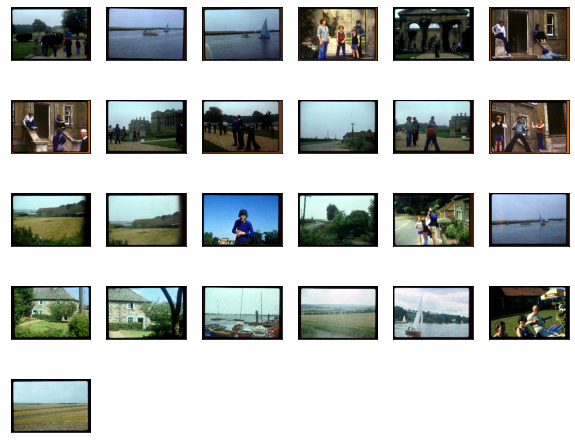

In [6]:
# plt.imshow(n[0][0].permute(1, 2, 0))
plt.figure(figsize=(10,10))
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))
# print("wbs calc")
number = 36
offset = 0
outputs = []
for i in range(len(raws))[:number]:
    gridsize = number**0.5//1+(number**0.5%1>0)*1
    plt.subplot(gridsize, gridsize,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pog = rawsgamma[i + offset] 
    
    # pogmed = np.median(pog, (0, 1))
    # print(i)
    toshow = (pog[::,::]-pogawbb)/(pogawbw-pogawbb)
    print(toshow.max(), toshow.min())
    outputs.append(toshow)
    plt.imshow(toshow[::30, ::30]*[1, 1, 1])
    # plt.xlabel(class_names[n[1][i]])

In [7]:
import imageio
# print(imageio.help("tiff"))
imageio.imwrite("test.jpg",(outputs[0].clip(0,1)*(2**8-1)).astype(np.uint8))


In [8]:
rawsgamma[5][1000:1005, 1000:1005,1]
# rpyraws[5].raw_colors_visible[1000:1005, 1000:1005]

array([[0.44382391, 0.43927672, 0.44628061, 0.44969863, 0.4493019 ],
       [0.44634165, 0.43692683, 0.43106737, 0.44911879, 0.44322881],
       [0.41474022, 0.41252766, 0.42243076, 0.45160601, 0.44838636],
       [0.41771572, 0.40502022, 0.42403296, 0.44943923, 0.45342184],
       [0.41289387, 0.4053254 , 0.43454643, 0.44588388, 0.45154498]])

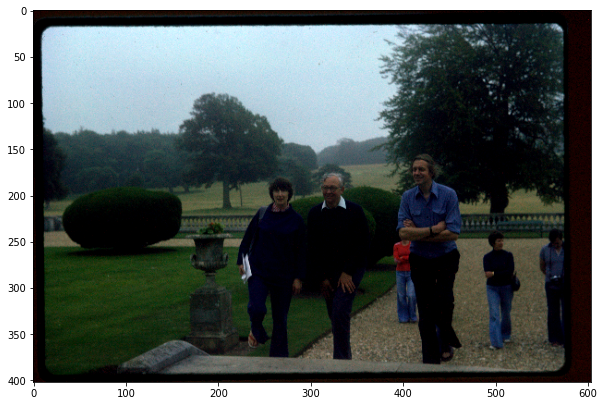

In [9]:
import matplotlib.colors
test = outputs[0][::10, ::10].clip(0,1)#*(2**8-1)).astype(np.uint8)
plt.imshow(test)

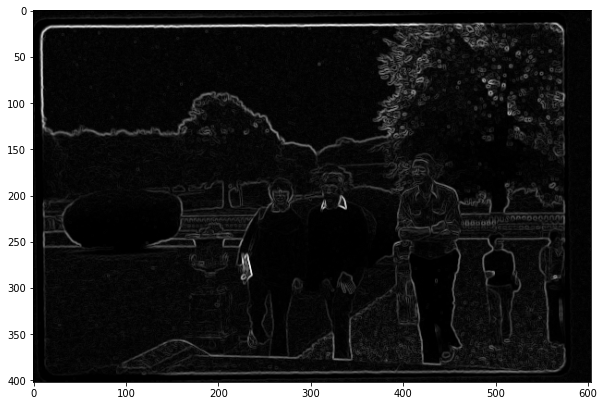

In [10]:
gx = convolve(test.mean(2), np.asarray([[1,2,1],[0, 0, 0],[-1,-2,-1]]))
gy = convolve(test.mean(2), np.asarray([[1,0,-1],[2, 0,-2],[1,0,-1]]))
edge = (gx**2+gy**2)**0.5

plt.imshow(edge, cmap='gray')

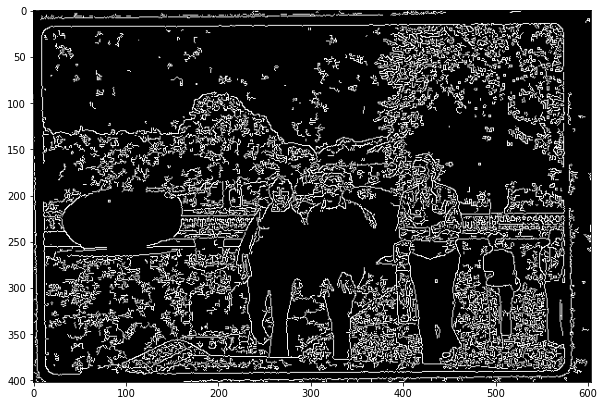

In [11]:
import cv2
plt.imshow(cv2.Canny((test*255).astype(np.uint8), 50, 140, 9), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


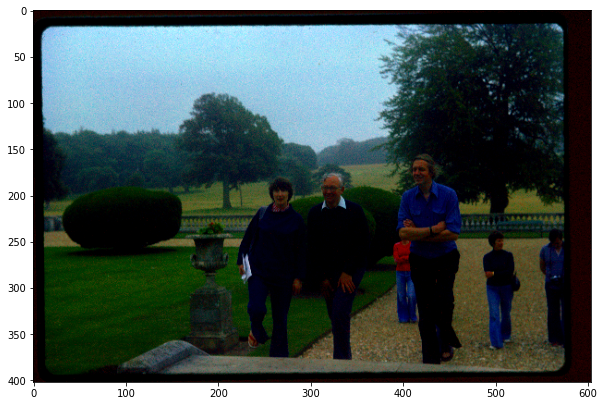

In [12]:
# test.astype(np.float32)
plt.imshow(cv2.cvtColor((cv2.cvtColor(test.astype(np.float32), cv2.COLOR_RGB2HSV)*[1, 1.8, 1]).astype(np.float32), cv2.COLOR_HSV2RGB))